# Курсовая работа № 2
## Аналитика. Начальный уровень

Курсовая работа состоит из двух частей – обязательной и дополнительной. **Для зачета необходимо выполнение только первой части.** Выполнение второй части может потребовать дополнительные знания Python.

- [Часть первая](#Часть-первая)
- [Часть вторая](#Часть-вторая)

## Часть первая


Перед вами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.
<br><br> В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании.
Сделайте обзор штата сотрудников компании. Составьте набор предметов исследования, а затем проверьте их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL. <br><br>

Примеры гипотез:
1. Есть зависимость между `perfomance score` и тем, под чьим руководством работает сотрудник.
2. Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.
2. Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.

<br><br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `human_resources`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`. Таблицы, доступные для анализа, – `hr_dataset`, `production_staff`, `recruiting_costs`, `salary_grid`.

### Импортируем необходимые библиотеки

In [43]:
import psycopg2
import pandas as pd
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt

### 1. Ознакомимся со входными данными

In [18]:
def make_df(table_name):
    cursor.execute('SELECT * FROM {}'.format(table_name))
    colnames = [desc[0] for desc in cursor.description] # Получение названий колонок
    records = cursor.fetchall() # Получение записей
    df = pd.DataFrame(records, columns=colnames)
    return df

conn = psycopg2.connect(host='dsstudents.skillbox.ru', port=5432, dbname='human_resources', user='readonly', 
                        password='6hajV34RTQfmxhS')

cursor = conn.cursor()

df_hr_dataset = make_df('hr_dataset')
df_production_staff = make_df('production_staff')
df_recruiting_costs = make_df('recruiting_costs')
df_salary_grid = make_df('salary_grid')
    
cursor.close()
conn.close()

In [19]:
pd.get_option('display.max_columns') # Количество отображаемых столбцов по умолчанию = 20
pd.set_option('display.max_columns', None) # Снимаем ограничение по количеству отображаемых столбцов
# pd.reset_option('max_columns') # Сбросить настройки по количеству отображаемых столбцов

In [20]:
df_hr_dataset

,id,Employee Name,Employee Number,marriedid,maritalstatusid,genderid,empstatus_id,deptid,perf_scoreid,age,Pay Rate,state,zip,dob,sex,maritaldesc,citizendesc,Hispanic/Latino,racedesc,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,department,position,Manager Name,Employee Source,Performance Score
0,1,"Brown, Mia",1103024456,1,1,0,1,1,3,30,28.50,MA,1450,1987-11-24,Female,Married,US Citizen,No,Black or African American,2008-10-27,3317,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,2,"LaRotonda, William",1106026572,0,2,1,1,1,3,34,23.00,MA,1460,1984-04-26,Male,Divorced,US Citizen,No,Black or African American,2014-01-06,1420,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,3,"Steans, Tyrone",1302053333,0,0,1,1,1,3,31,29.00,MA,2703,1986-09-01,Male,Single,US Citizen,No,White,2014-09-29,1154,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,4,"Howard, Estelle",1211050782,1,1,0,1,1,9,32,21.50,MA,2170,1985-09-16,Female,Married,US Citizen,No,White,2015-02-16,58,2015-04-15,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,5,"Singh, Nan",1307059817,0,0,0,1,1,9,30,16.56,MA,2330,1988-05-19,Female,Single,US Citizen,No,White,2015-05-01,940,None,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,306,"Navathe, Kurt",1009919960,0,0,1,1,3,3,48,52.25,MA,2056,1970-04-25,Male,Single,US Citizen,No,Asian,2017-02-10,289,None,N/A - still employed,Active,IT/IS,Senior BI Developer,Brian Champaigne,Indeed,Fully Meets
306,307,"Wang, Charlie",1009919970,0,0,1,1,3,3,36,51.00,MA,1887,1981-07-08,Male,Single,US Citizen,No,Asian,2017-02-15,284,None,N/A - still employed,Active,IT/IS,Senior BI Developer,Brian Champaigne,Indeed,Fully Meets
307,308,"Smith, Jason",1009919980,0,0,1,1,3,3,34,46.00,MA,2045,1983-09-04,Male,Single,US Citizen,No,White,2017-02-15,284,None,N/A - still employed,Active,IT/IS,BI Developer,Brian Champaigne,Indeed,Fully Meets
308,309,"Westinghouse, Matthew",1009919990,1,1,1,1,3,3,30,45.00,MA,2134,1987-10-24,Male,Married,US Citizen,No,White,2017-04-20,220,None,N/A - still employed,Active,IT/IS,BI Developer,Brian Champaigne,Indeed,Fully Meets


In [21]:
df_production_staff

,id,Employee Name,Race Desc,Date of Hire,TermDate,Reason for Term,Employment Status,Department,Position,Pay,Manager Name,Performance Score,Abutments/Hour Wk 1,Abutments/Hour Wk 2,Daily Error Rate,90-day Complaints
0,1,"Albert, Michael",White,2011-08-01,None,N/A - still employed,Active,Production,Production Manager,$54.50,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
1,2,"Bozzi, Charles",Asian,2013-09-30,2014-08-07,retiring,Voluntarily Terminated,Production,Production Manager,$50.50,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
2,3,"Butler, Webster L",White,2016-01-28,None,N/A - still employed,Active,Production,Production Manager,$55.00,Elisa Bramante,Exceeds,0.0,0.0,0.0,0.0
3,4,"Dunn, Amy",White,2014-09-18,None,N/A - still employed,Active,Production,Production Manager,$51.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
4,5,"Gray, Elijiah",White,2015-06-02,None,N/A - still employed,Active,Production,Production Manager,$54.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,252,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN
252,253,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN
253,254,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN
254,255,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN


In [22]:
df_recruiting_costs

,id,Employment Source,January,February,March,April,May,June,July,August,September,October,November,December,Total
0,1,Billboard,520,520,520,520,0,0,612,612,729,749,910,500,6192
1,2,Careerbuilder,410,410,410,820,820,410,410,820,820,1230,820,410,7790
2,3,Company Intranet - Partner,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Diversity Job Fair,0,5129,0,0,0,0,0,4892,0,0,0,0,10021
4,5,Employee Referral,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,Glassdoor,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,Information Session,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,Internet Search,0,0,0,0,0,0,0,0,0,0,0,0,0
8,9,MBTA ads,640,640,640,640,640,640,640,1300,1300,1300,1300,1300,10980
9,10,Monster.com,500,500,500,440,500,500,440,500,440,440,500,500,5760


In [23]:
df_salary_grid

,id,Position,Salary Min,Salary Mid,Salary Max,Hourly Min,Hourly Mid,Hourly Max
0,1,Administrative Assistant,30000,40000,50000,14.42,19.23,24.04
1,2,Sr. Administrative Assistant,35000,45000,55000,16.83,21.63,26.44
2,3,Accountant I,42274,51425,62299,20.32,24.72,29.95
3,4,Accountant II,50490,62158,74658,24.27,29.88,35.89
4,5,Sr. Accountant,63264,76988,92454,30.42,37.01,44.45
5,6,Network Engineer,50845,66850,88279,24.44,32.14,42.44
6,7,Sr. Network Engineer,79428,99458,120451,38.19,47.82,57.91
7,8,Database Administrator,50569,68306,93312,24.31,32.84,44.86
8,9,Sr. DBA,92863,116007,139170,44.65,55.77,66.91
9,10,Production Technician I,30000,40000,50000,14.42,19.23,24.04


Посмотрим на наличие пропущенных значений

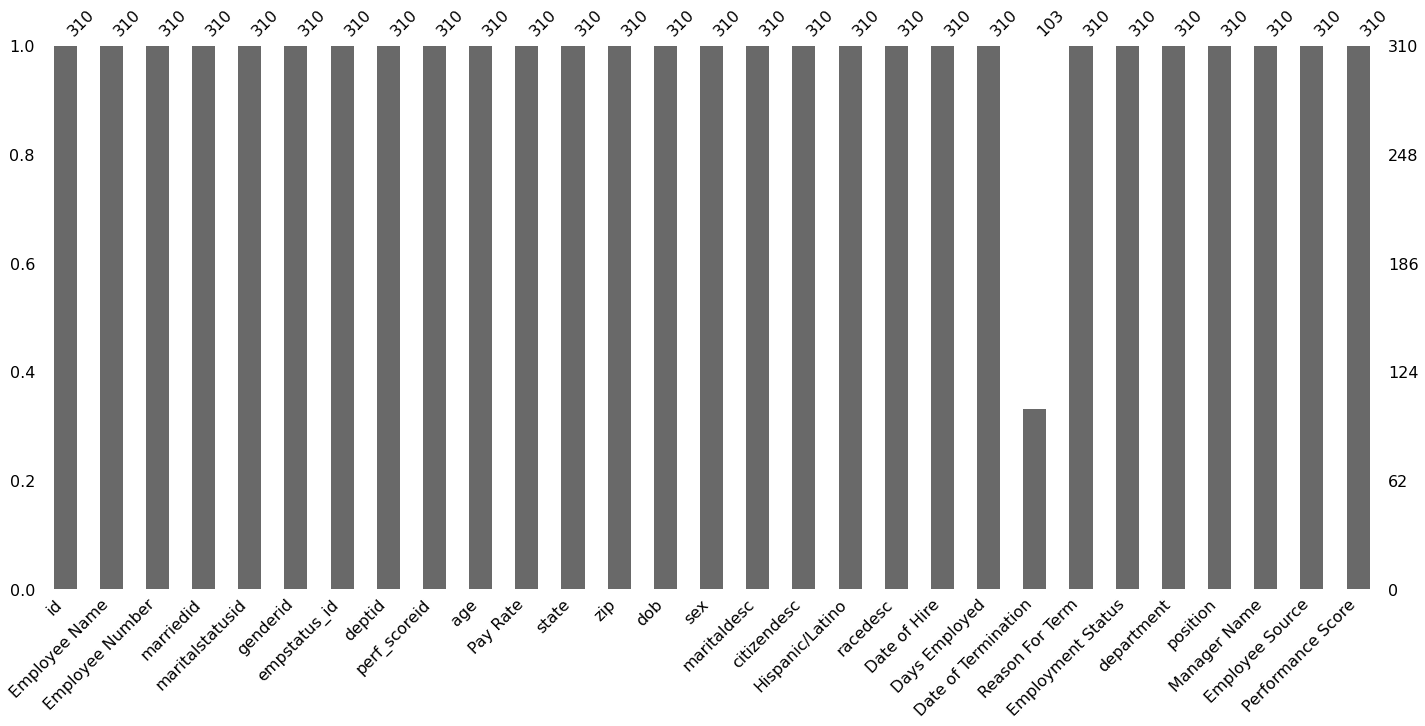

In [24]:
[df_hr_dataset, df_production_staff, df_recruiting_costs, df_salary_grid]

msno.bar(df_hr_dataset)

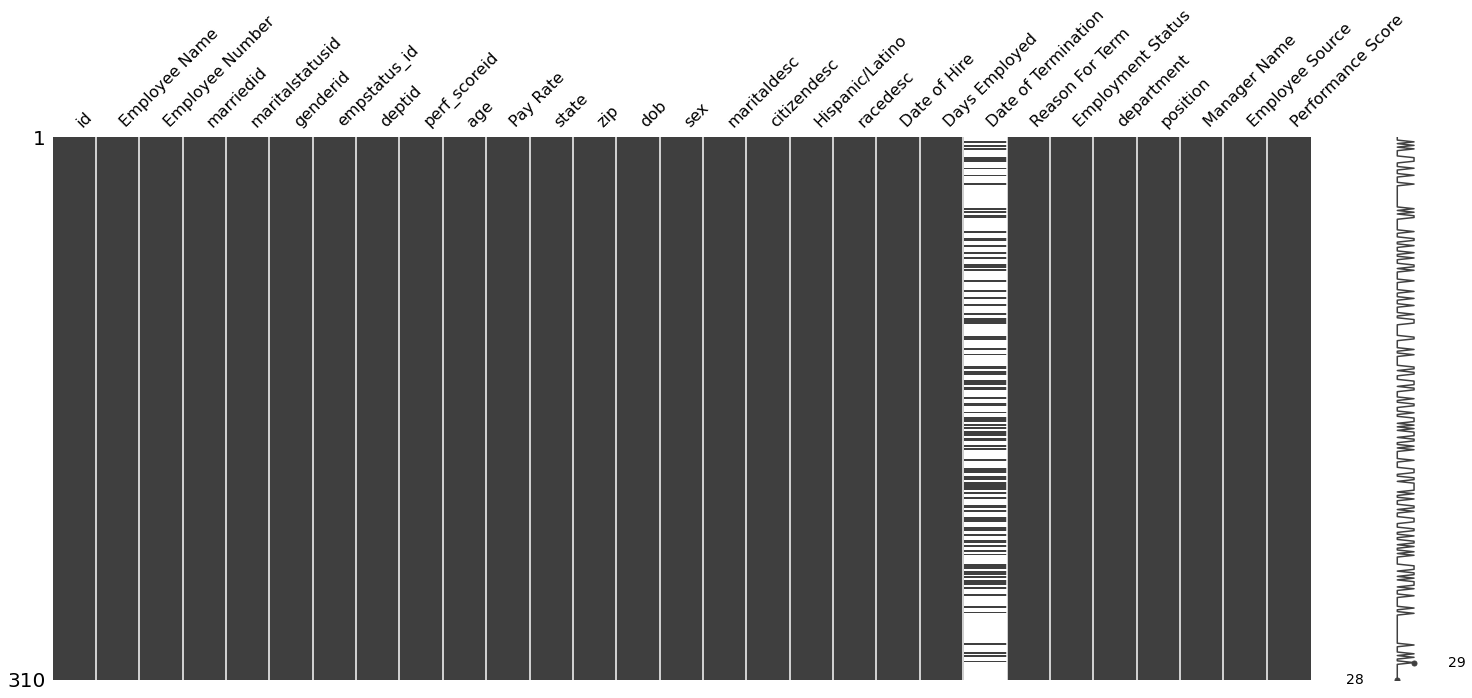

In [25]:
msno.matrix(df_hr_dataset)

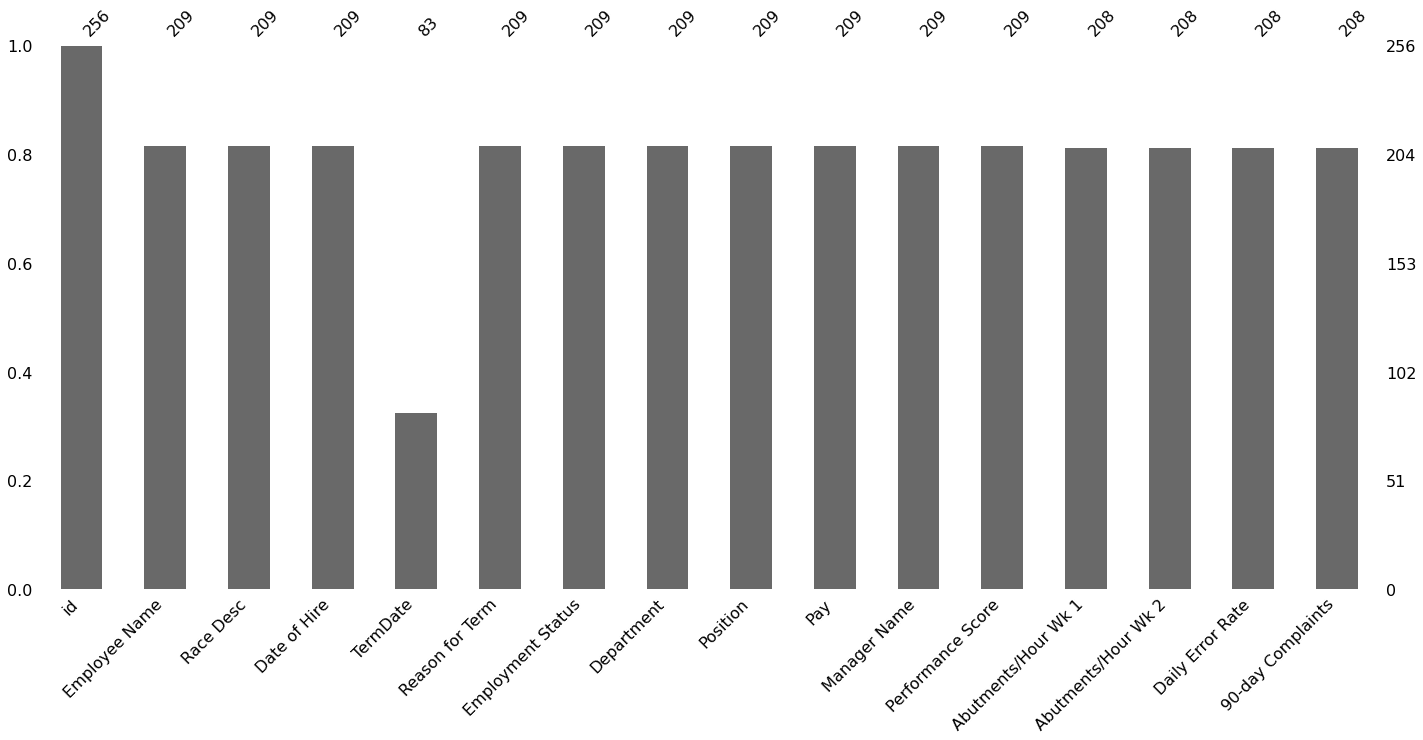

In [26]:
msno.bar(df_production_staff)

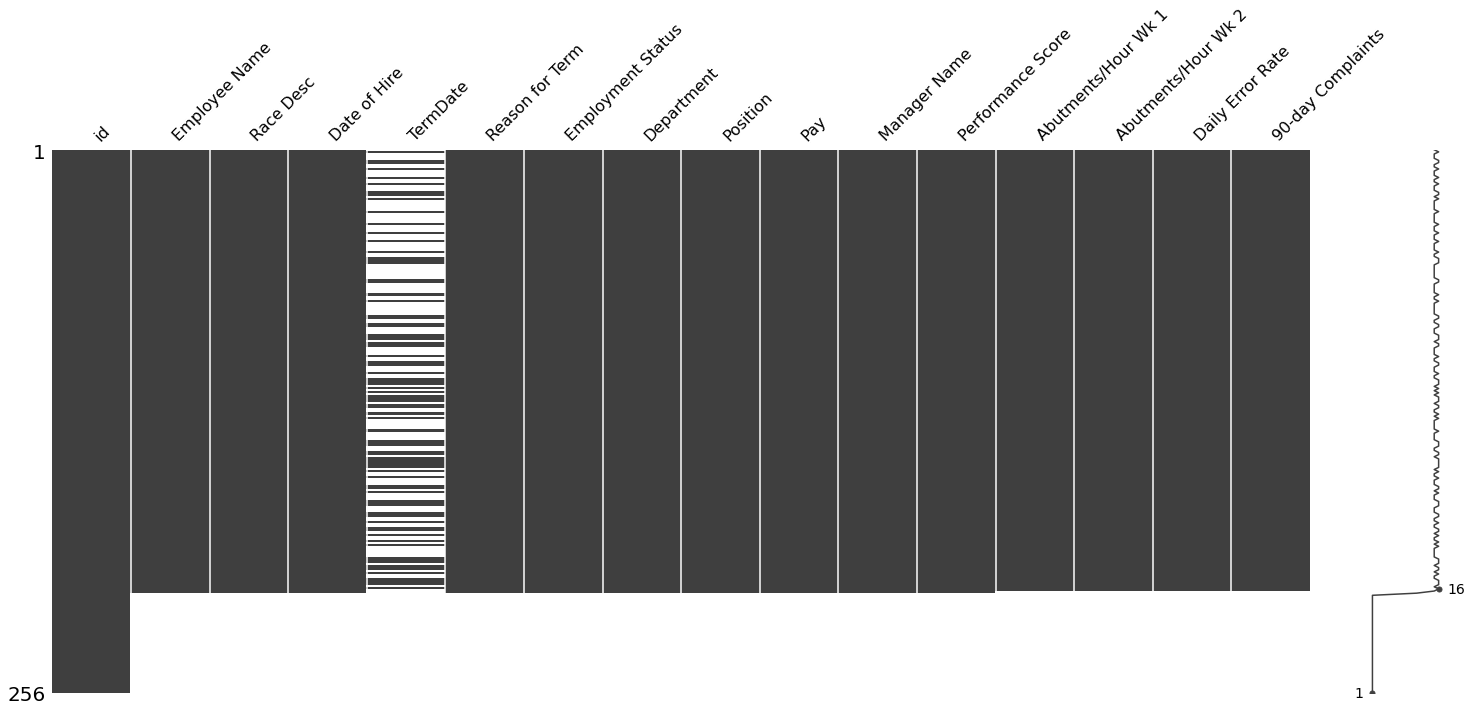

In [27]:
msno.matrix(df_production_staff)

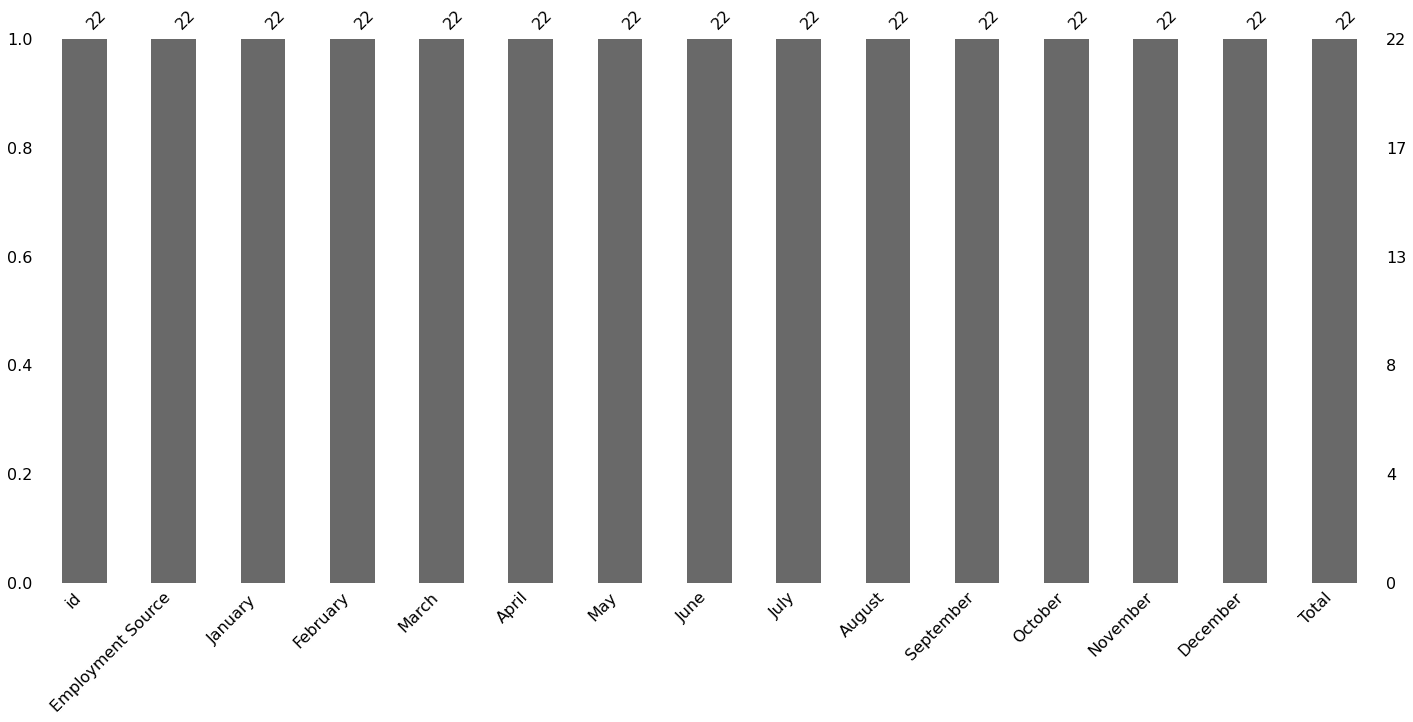

In [28]:
msno.bar(df_recruiting_costs)

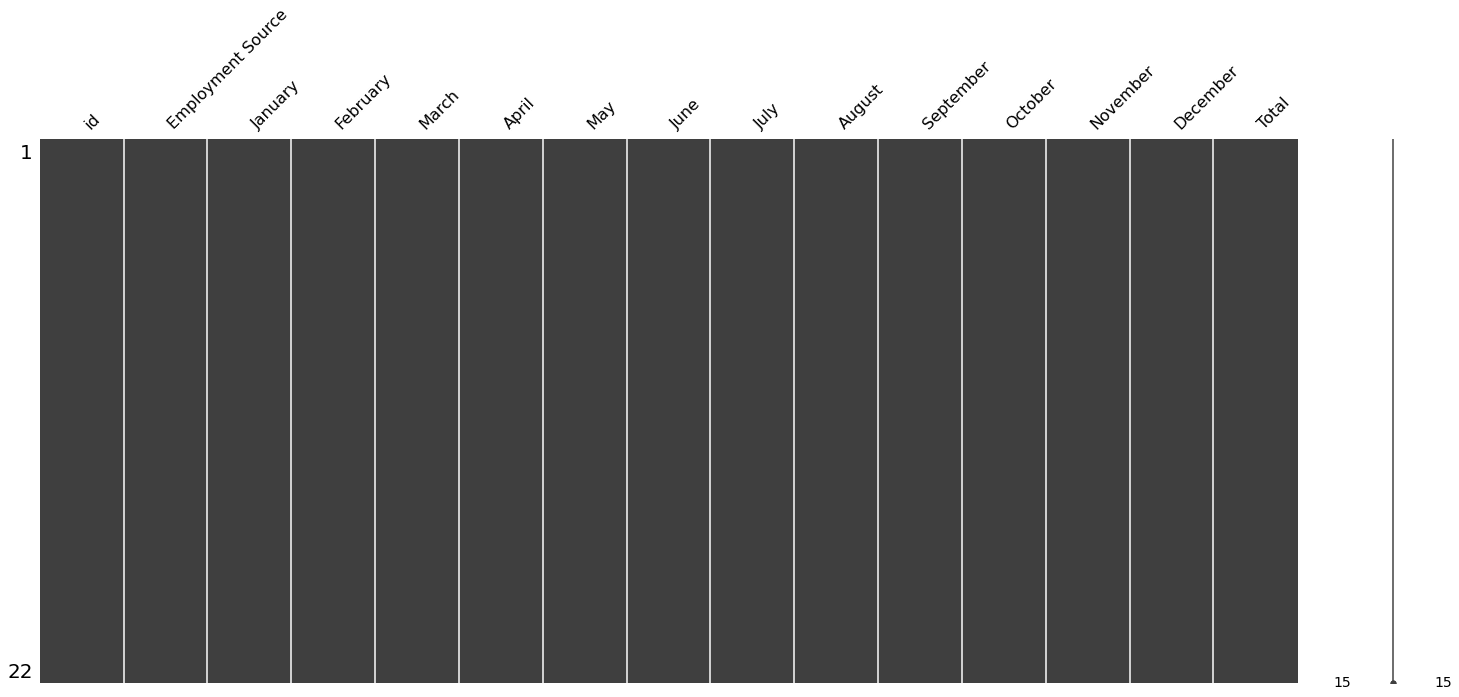

In [29]:
msno.matrix(df_recruiting_costs)

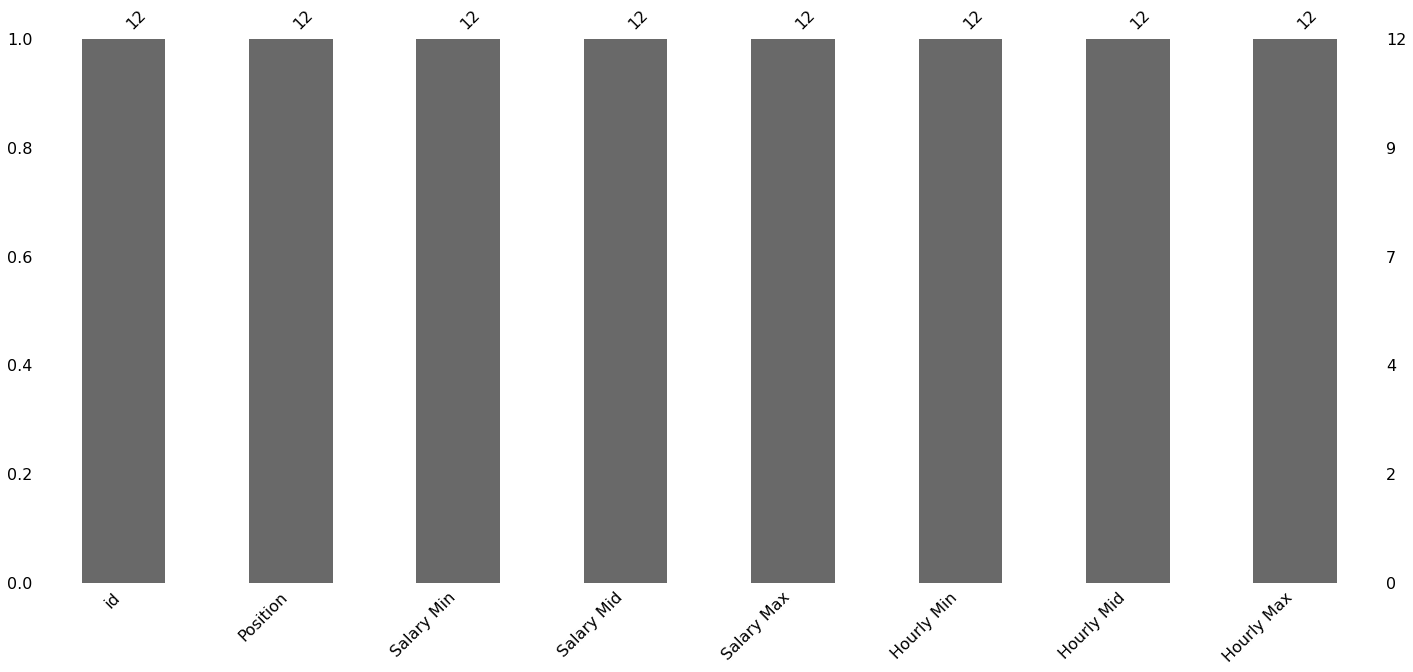

In [30]:
msno.bar(df_salary_grid)

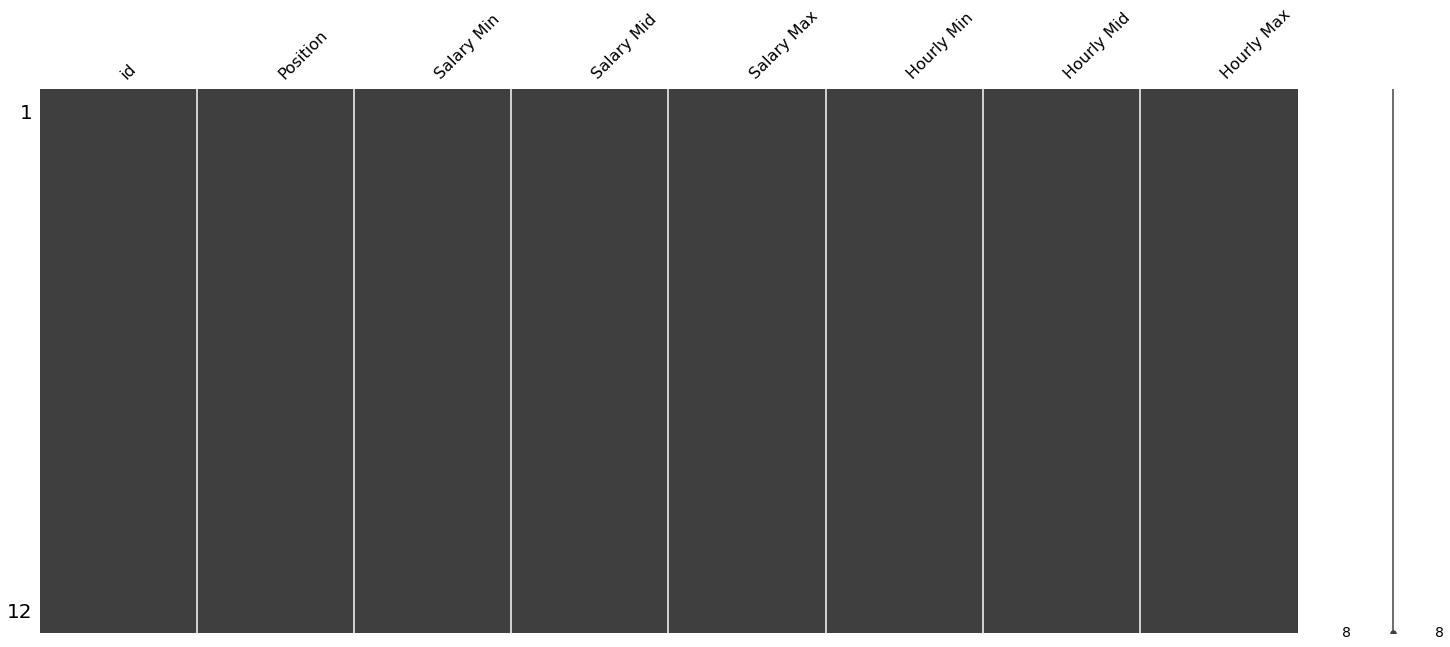

In [31]:
msno.matrix(df_salary_grid)

In [32]:
for df in [df_hr_dataset, df_production_staff, df_recruiting_costs, df_salary_grid]:
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   310 non-null    int64  
 1   Employee Name        310 non-null    object 
 2   Employee Number      310 non-null    int64  
 3   marriedid            310 non-null    int64  
 4   maritalstatusid      310 non-null    int64  
 5   genderid             310 non-null    int64  
 6   empstatus_id         310 non-null    int64  
 7   deptid               310 non-null    int64  
 8   perf_scoreid         310 non-null    int64  
 9   age                  310 non-null    int64  
 10  Pay Rate             310 non-null    float64
 11  state                310 non-null    object 
 12  zip                  310 non-null    int64  
 13  dob                  310 non-null    object 
 14  sex                  310 non-null    object 
 15  maritaldesc          310 non-null    obj

### Проверяемые гипотезы:
1. "Старшие" сотрудники проводят на работе больше времени, чем их коллеги.
2. Чем выше должность, тем больше вознаграждение.
3. Семейные сотрудники реже увольняются.
5. Подавляющее большинство (>80 %) руководителей - мужчины.
6. Молодые сотрудники увольняются чаще.

#### Проверка гипотезы: "Старшие" сотрудники проводят на работе больше времени, чем их коллеги.

In [45]:
conn = psycopg2.connect(host='dsstudents.skillbox.ru', port=5432, dbname='human_resources', user='readonly', 
                        password='6hajV34RTQfmxhS')

cursor = conn.cursor()

req = """SELECT 
         AVG(CASE WHEN "Position" LIKE 'Sr%' THEN "Hourly Mid" ELSE null END) sr,
         AVG(CASE WHEN "Position" NOT LIKE 'Sr%' THEN "Hourly Mid" ELSE null END) not_sr
         FROM salary_grid
      """

cursor.execute(req)

colnames = [desc[0] for desc in cursor.description] # Получение названий колонок
records = cursor.fetchall() # Получение записей

df = pd.DataFrame(records, columns=colnames)

cursor.close()
conn.close()

df = df.T
df

,0
sr,40.557499
not_sr,25.945000


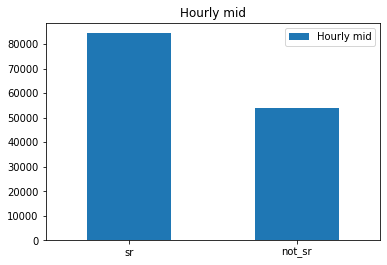

In [61]:
ax = df.plot.bar(rot=0)
ax.set_title('Hourly mid')
ax.legend(['Hourly mid'])
plt.show()

Вывод: чем выше должность - тем больше работаешь.

#### Проверка гипотезы: Чем выше должность, тем больше вознаграждение.

In [48]:
conn = psycopg2.connect(host='dsstudents.skillbox.ru', port=5432, dbname='human_resources', user='readonly', 
                        password='6hajV34RTQfmxhS')

cursor = conn.cursor()

req = """SELECT 
         AVG(CASE WHEN "Position" LIKE 'Sr%' THEN "Salary Mid" ELSE null END) sr,
         AVG(CASE WHEN "Position" NOT LIKE 'Sr%' THEN "Salary Mid" ELSE null END) not_sr
         FROM salary_grid
      """

cursor.execute(req)

colnames = [desc[0] for desc in cursor.description] # Получение названий колонок
records = cursor.fetchall() # Получение записей

df = pd.DataFrame(records, columns=colnames)

cursor.close()
conn.close()

df = df.T
df = df.astype(float)
df

,0
sr,84363.250
not_sr,53967.375


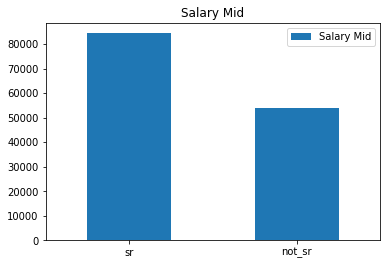

In [62]:
ax = df.plot.bar(rot=0)
ax.set_title('Salary Mid')
ax.legend(['Salary Mid'])
plt.show()

Вывод: чем выше должность - тем больше вознаграждение.

#### Проверка гипотезы: Семейные сотрудники реже увольняются.

In [136]:
conn = psycopg2.connect(host='dsstudents.skillbox.ru', port=5432, dbname='human_resources', user='readonly', 
                        password='6hajV34RTQfmxhS')

cursor = conn.cursor()

req = """SELECT 
         COUNT(CASE WHEN ("marriedid" = '1') AND ("Date of Termination" IS NOT NULL) THEN "id" ELSE null END) marriedid,
         COUNT(CASE WHEN ("marriedid" = '0') AND ("Date of Termination" IS NOT NULL) THEN "id" ELSE null END) not_marriedid
         FROM hr_dataset
      """


cursor.execute(req)

colnames = [desc[0] for desc in cursor.description] # Получение названий колонок
records = cursor.fetchall() # Получение записей

df = pd.DataFrame(records, columns=colnames)

cursor.close()
conn.close()

df

,marriedid,not_marriedid
0,46,57


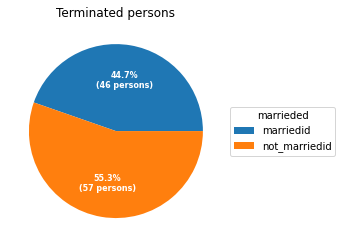

In [137]:
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))

data = [df.iloc[0].marriedid, df.iloc[0].not_marriedid]
ingredients = df.columns.to_list()


def func(pct, allvals):
    absolute = int(np.around(pct/100*sum(allvals)))
    return "{:.1f}%\n({} persons)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="marrieded",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Terminated persons")

plt.show()

Вывод: неженатые сотрудники увольняются чаще

In [138]:
conn = psycopg2.connect(host='dsstudents.skillbox.ru', port=5432, dbname='human_resources', user='readonly', 
                        password='6hajV34RTQfmxhS')

cursor = conn.cursor()

req = """SELECT 
         COUNT(CASE WHEN ("sex" = 'Female') AND ("Date of Termination" IS NOT NULL) THEN "id" ELSE null END) female,
         COUNT(CASE WHEN ("sex" = 'Male') AND ("Date of Termination" IS NOT NULL) THEN "id" ELSE null END) male
         FROM hr_dataset
      """


cursor.execute(req)

colnames = [desc[0] for desc in cursor.description] # Получение названий колонок
records = cursor.fetchall() # Получение записей

df = pd.DataFrame(records, columns=colnames)

cursor.close()
conn.close()

df

,female,male
0,60,43


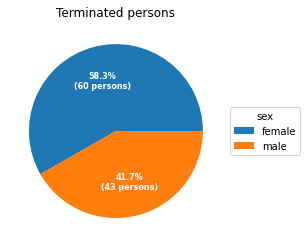

In [141]:
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))

data = [df.iloc[0].female, df.iloc[0].male]
ingredients = df.columns.to_list()


def func(pct, allvals):
    absolute = int(np.around(pct/100*sum(allvals)))
    return "{:.1f}%\n({} persons)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="sex",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Terminated persons")

plt.show()

Вывод: женщины увольняются чаще

In [143]:
conn = psycopg2.connect(host='dsstudents.skillbox.ru', port=5432, dbname='human_resources', user='readonly', 
                        password='6hajV34RTQfmxhS')

cursor = conn.cursor()

req = """SELECT 
         COUNT(CASE WHEN ("marriedid" = '1') AND ("sex" = 'Female') AND ("Date of Termination" IS NOT NULL) THEN "id" ELSE null END) marriedid_female,
         COUNT(CASE WHEN ("marriedid" = '0') AND ("sex" = 'Female') AND ("Date of Termination" IS NOT NULL) THEN "id" ELSE null END) not_marriedid_female
         FROM hr_dataset
      """


cursor.execute(req)

colnames = [desc[0] for desc in cursor.description] # Получение названий колонок
records = cursor.fetchall() # Получение записей

df = pd.DataFrame(records, columns=colnames)

cursor.close()
conn.close()

df

,marriedid_female,not_marriedid_female
0,27,33


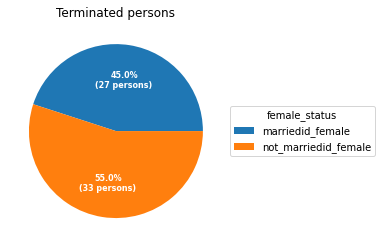

In [146]:
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))

data = [df.iloc[0].marriedid_female, df.iloc[0].not_marriedid_female]
ingredients = df.columns.to_list()


def func(pct, allvals):
    absolute = int(np.around(pct/100*sum(allvals)))
    return "{:.1f}%\n({} persons)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="female_status",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Terminated persons")

plt.show()

Вывод: Среди всех уволенных женщин 55% не были в браке.

In [148]:
conn = psycopg2.connect(host='dsstudents.skillbox.ru', port=5432, dbname='human_resources', user='readonly', 
                        password='6hajV34RTQfmxhS')

cursor = conn.cursor()

req = """SELECT 
         COUNT(CASE WHEN ("marriedid" = '1') AND ("sex" = 'Male') AND ("Date of Termination" IS NOT NULL) THEN "id" ELSE null END) marriedid_male,
         COUNT(CASE WHEN ("marriedid" = '0') AND ("sex" = 'Male') AND ("Date of Termination" IS NOT NULL) THEN "id" ELSE null END) not_marriedid_male
         FROM hr_dataset
      """


cursor.execute(req)

colnames = [desc[0] for desc in cursor.description] # Получение названий колонок
records = cursor.fetchall() # Получение записей

df = pd.DataFrame(records, columns=colnames)

cursor.close()
conn.close()

df

,marriedid_male,not_marriedid_male
0,19,24


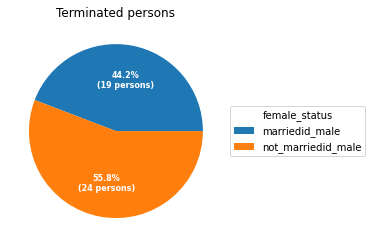

In [149]:
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))

data = [df.iloc[0].marriedid_male, df.iloc[0].not_marriedid_male]
ingredients = df.columns.to_list()


def func(pct, allvals):
    absolute = int(np.around(pct/100*sum(allvals)))
    return "{:.1f}%\n({} persons)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="female_status",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Terminated persons")

plt.show()

Вывод: Среди всех уволенных мужчин более 55% не были в браке.

In [165]:
# Средний возраст уволенных сотрудников
conn = psycopg2.connect(host='dsstudents.skillbox.ru', port=5432, dbname='human_resources', user='readonly', 
                        password='6hajV34RTQfmxhS')

cursor = conn.cursor()

req = """SELECT
         AVG(CASE WHEN ("sex" = 'Male') AND ("Date of Termination" IS NOT NULL) THEN "age" ELSE null END) male,
         AVG(CASE WHEN ("sex" = 'Female') AND ("Date of Termination" IS NOT NULL) THEN "age" ELSE null END) female
         FROM hr_dataset
      """


cursor.execute(req)

colnames = [desc[0] for desc in cursor.description] # Получение названий колонок
records = cursor.fetchall() # Получение записей

df = pd.DataFrame(records, columns=colnames)

cursor.close()
conn.close()

df = df.T
df = df.astype(float)
df

,0
male,39.651163
female,40.400000


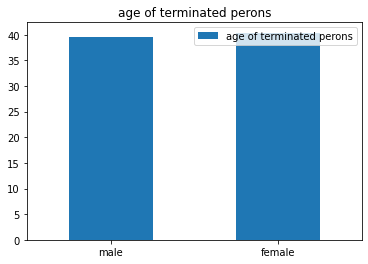

In [166]:
ax = df.plot.bar(rot=0)
ax.set_title('age of terminated perons')
ax.legend(['age of terminated perons'])
plt.show()

Вывод: средний возраст уволенных сотрудников среди мужчин и среди женщин приблизительно одинаковый

**Рекомендация HR: Т.к. свободные (не женатые) сотрудники увольняются чаще и среди мужчин и среди женщин, то нужно поженить  мужчин и женщин (тем более они ровестники), чтобы уменьшить текучку кадров:)**

In [ ]:
# df_production_staff, df_recruiting_costs, df_salary_grid]
df_hr_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   310 non-null    int64  
 1   Employee Name        310 non-null    object 
 2   Employee Number      310 non-null    int64  
 3   marriedid            310 non-null    int64  
 4   maritalstatusid      310 non-null    int64  
 5   genderid             310 non-null    int64  
 6   empstatus_id         310 non-null    int64  
 7   deptid               310 non-null    int64  
 8   perf_scoreid         310 non-null    int64  
 9   age                  310 non-null    int64  
 10  Pay Rate             310 non-null    float64
 11  state                310 non-null    object 
 12  zip                  310 non-null    int64  
 13  dob                  310 non-null    object 
 14  sex                  310 non-null    object 
 15  maritaldesc          310 non-null    obj

In [179]:
# Как много среди уволенных "старших" сотрудников

conn = psycopg2.connect(host='dsstudents.skillbox.ru', port=5432, dbname='human_resources', user='readonly', 
                        password='6hajV34RTQfmxhS')

cursor = conn.cursor()


req = """SELECT
         SUM(CASE WHEN ("position" LIKE 'Sr%' OR "position" LIKE '%enior%') AND ("Date of Termination" IS NOT NULL) THEN 1 ELSE null END) sr,
         SUM(CASE WHEN ("position" NOT LIKE 'Sr%' AND "position" NOT LIKE '%enior%') AND ("Date of Termination" IS NOT NULL) THEN 1 ELSE null END) not_sr
         FROM hr_dataset
      """
# req = """SELECT COUNT(*)
#          FROM hr_dataset
#          WHERE ("position" LIKE 'Sr%' OR "position" LIKE '%enior%') AND ("Date of Termination" IS NOT NULL)
#       """

cursor.execute(req)

colnames = [desc[0] for desc in cursor.description] # Получение названий колонок
records = cursor.fetchall() # Получение записей

df = pd.DataFrame(records, columns=colnames)

cursor.close()
conn.close()

df

,sr,not_sr
0,3,100


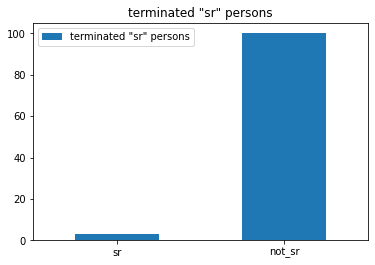

In [181]:
ax = df.T.plot.bar(rot=0)
ax.set_title('terminated "sr" persons')
ax.legend(['terminated "sr" persons'])
plt.show()

Вывод: "Старшие" сотрудники почти не увольняются. Из 103 уволенных было всего 3 старших специалиста.

**Рекомендация HR: Не "тормозить" повышение сотрудников**

В связи с дальнейшим исследованием: повысить сотрудников до "старших" ведь некоторые это заслуживают (проверим это далее).

#### Проверка гипотезы: Подавляющее большинство (>80 %) руководителей - мужчины.

In [195]:
conn = psycopg2.connect(host='dsstudents.skillbox.ru', port=5432, dbname='human_resources', user='readonly', 
                        password='6hajV34RTQfmxhS')

cursor = conn.cursor()

req = """SELECT
         COUNT(CASE WHEN ("sex" = 'Male') AND ("position" LIKE 'Sr%') THEN "id" ELSE null END) male,
         COUNT(CASE WHEN ("sex" = 'Female') AND ("position" LIKE 'Sr%') THEN "id" ELSE null END) female
         FROM hr_dataset
      """


cursor.execute(req)

colnames = [desc[0] for desc in cursor.description] # Получение названий колонок
records = cursor.fetchall() # Получение записей

df = pd.DataFrame(records, columns=colnames)

cursor.close()
conn.close()

df

,male,female
0,5,6


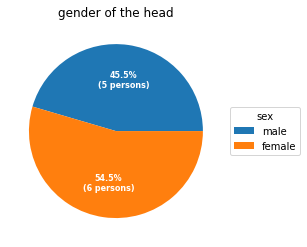

In [196]:
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))

data = [df.iloc[0].male, df.iloc[0].female]
ingredients = df.columns.to_list()


def func(pct, allvals):
    absolute = int(np.around(pct/100*sum(allvals)))
    return "{:.1f}%\n({} persons)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="sex",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("gender of the head")

plt.show()

In [197]:
conn = psycopg2.connect(host='dsstudents.skillbox.ru', port=5432, dbname='human_resources', user='readonly', 
                        password='6hajV34RTQfmxhS')

cursor = conn.cursor()

req = """SELECT *
         FROM hr_dataset
         WHERE "position" LIKE 'Sr%'
      """


cursor.execute(req)

colnames = [desc[0] for desc in cursor.description] # Получение названий колонок
records = cursor.fetchall() # Получение записей

df = pd.DataFrame(records, columns=colnames)

cursor.close()
conn.close()

df

,id,Employee Name,Employee Number,marriedid,maritalstatusid,genderid,empstatus_id,deptid,perf_scoreid,age,Pay Rate,state,zip,dob,sex,maritaldesc,citizendesc,Hispanic/Latino,racedesc,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,department,position,Manager Name,Employee Source,Performance Score
0,9,"Boutwell, Bonalyn",1307060188,1,1,0,1,1,0,31,34.95,MA,2468,1987-04-04,Female,Married,US Citizen,No,Asian,2015-02-16,1014,None,N/A - still employed,Active,Admin Offices,Sr. Accountant,Brandon R. LeBlanc,Diversity Job Fair,90-day meets
1,10,"Foster-Baker, Amy",1201031308,1,1,0,1,1,3,39,34.95,MA,2050,1979-04-16,Female,Married,US Citizen,no,White,2009-01-05,3247,None,N/A - still employed,Active,Admin Offices,Sr. Accountant,Board of Directors,Other,Fully Meets
2,44,"Ait Sidi, Karthikeyan",1307060199,1,1,1,5,3,3,43,62.00,MA,2148,1975-05-05,Male,Married,US Citizen,No,White,2015-03-30,444,2016-06-16,career change,Voluntarily Terminated,IT/IS,Sr. DBA,Simon Roup,Company Intranet - Partner,Fully Meets
3,45,"Carr, Claudia N",1010022337,0,0,0,2,3,9,31,61.30,MA,1886,1986-06-06,Female,Single,US Citizen,No,Black or African American,2016-06-30,514,None,N/A - Has not started yet,Future Start,IT/IS,Sr. DBA,Simon Roup,Vendor Referral,N/A- too early to review
4,46,"Favis, Donald",1412071562,0,0,1,4,3,3,53,58.20,CT,6033,1964-07-30,Male,Single,US Citizen,No,Black or African American,2014-02-17,732,2016-02-19,hours,Terminated for Cause,IT/IS,Sr. DBA,Simon Roup,Vendor Referral,Fully Meets
5,47,"Roehrich, Bianca",1111030266,0,0,0,5,3,0,45,58.50,MA,2703,1973-05-27,Female,Single,US Citizen,Yes,White,2015-01-05,309,2015-11-10,Another position,Voluntarily Terminated,IT/IS,Sr. DBA,Simon Roup,Vendor Referral,90-day meets
6,48,"Daniele, Ann",1411071312,1,1,0,3,3,3,66,54.10,CT,6033,1952-01-18,Female,Married,US Citizen,No,White,2014-11-10,1112,None,N/A - still employed,Leave of Absence,IT/IS,Sr. Network Engineer,Peter Monroe,Vendor Referral,Fully Meets
7,49,"Lajiri, Jyoti",1108028108,1,1,1,3,3,3,32,56.20,MA,2169,1986-04-23,Male,Married,US Citizen,No,White,2014-11-10,1112,None,N/A - still employed,Leave of Absence,IT/IS,Sr. Network Engineer,Peter Monroe,Employee Referral,Fully Meets
8,50,"Semizoglou, Jeremiah",904013591,1,1,1,2,3,9,35,53.80,MA,1545,1983-02-09,Male,Married,US Citizen,No,Asian,2016-06-30,514,None,N/A - Has not started yet,Future Start,IT/IS,Sr. Network Engineer,Peter Monroe,On-campus Recruiting,N/A- too early to review
9,51,"South, Joe",1308060959,0,0,1,1,3,0,52,53.00,CT,6278,1965-09-09,Male,Single,US Citizen,No,White,2014-11-10,1112,None,N/A - still employed,Active,IT/IS,Sr. Network Engineer,Peter Monroe,Employee Referral,90-day meets


Посмотрим какие должности есть в таблице *hr_dataset*

In [198]:
conn = psycopg2.connect(host='dsstudents.skillbox.ru', port=5432, dbname='human_resources', user='readonly', 
                        password='6hajV34RTQfmxhS')

cursor = conn.cursor()

req = """SELECT "position", COUNT(*)
         FROM hr_dataset
         GROUP BY "position"
      """

cursor.execute(req)

colnames = [desc[0] for desc in cursor.description] # Получение названий колонок
records = cursor.fetchall() # Получение записей

df = pd.DataFrame(records, columns=colnames)

cursor.close()
conn.close()

df

,position,count
0,IT Support,4
1,Database Administrator,13
2,Software Engineering Manager,1
3,Production Manager,14
4,Senior BI Developer,3
5,Shared Services Manager,2
6,BI Developer,4
7,CIO,1
8,Sales Manager,3
9,Sr. DBA,4


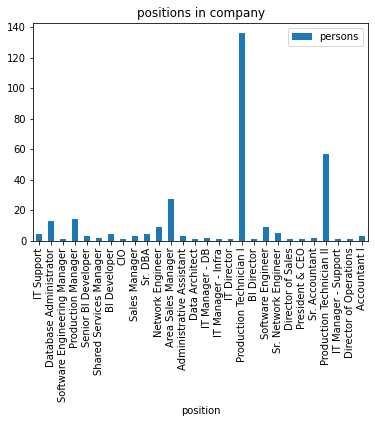

In [199]:
df.index = df.position
ax = df.plot.bar()
ax.set_title('positions in company')
ax.legend(['persons'])
plt.show()

В таблице есть должности которых нет в таблице *salary_grid*.
Перепроверим данные.

In [200]:
conn = psycopg2.connect(host='dsstudents.skillbox.ru', port=5432, dbname='human_resources', user='readonly', 
                        password='6hajV34RTQfmxhS')

cursor = conn.cursor()

req = """SELECT
         COUNT(CASE WHEN ("sex" = 'Male') AND ("position" LIKE '%Director%') THEN "id" ELSE null END) male,
         COUNT(CASE WHEN ("sex" = 'Female') AND ("position" LIKE '%Director%') THEN "id" ELSE null END) female
         FROM hr_dataset
      """


cursor.execute(req)

colnames = [desc[0] for desc in cursor.description] # Получение названий колонок
records = cursor.fetchall() # Получение записей

df = pd.DataFrame(records, columns=colnames)

cursor.close()
conn.close()

df

,male,female
0,2,2


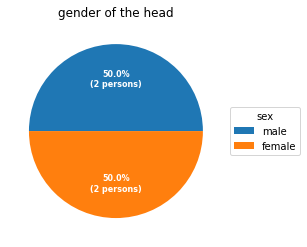

In [201]:
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))

data = [df.iloc[0].male, df.iloc[0].female]
ingredients = df.columns.to_list()


def func(pct, allvals):
    absolute = int(np.around(pct/100*sum(allvals)))
    return "{:.1f}%\n({} persons)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="sex",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("gender of the head")

plt.show()

Вывод: Руководящие должности делят пополам между собой мужчины и женщины.

In [202]:
conn = psycopg2.connect(host='dsstudents.skillbox.ru', port=5432, dbname='human_resources', user='readonly', 
                        password='6hajV34RTQfmxhS')

cursor = conn.cursor()

req = """SELECT
         COUNT(CASE WHEN ("sex" = 'Male') AND (("position" LIKE '%Senior%') OR ("position" LIKE '%Sr.%')) THEN "id" ELSE null END) male,
         COUNT(CASE WHEN ("sex" = 'Female') AND (("position" LIKE '%Senior%') OR ("position" LIKE '%Sr.%')) THEN "id" ELSE null END) female
         FROM hr_dataset
      """


cursor.execute(req)

colnames = [desc[0] for desc in cursor.description] # Получение названий колонок
records = cursor.fetchall() # Получение записей

df = pd.DataFrame(records, columns=colnames)

cursor.close()
conn.close()

df

,male,female
0,7,7


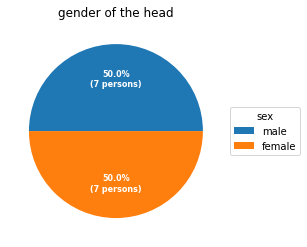

In [203]:
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))

data = [df.iloc[0].male, df.iloc[0].female]
ingredients = df.columns.to_list()


def func(pct, allvals):
    absolute = int(np.around(pct/100*sum(allvals)))
    return "{:.1f}%\n({} persons)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="sex",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("gender of the head")

plt.show()

Вывод: среди "старших" сотрудников также половина мужчин и половина женщин.

In [217]:
conn = psycopg2.connect(host='dsstudents.skillbox.ru', port=5432, dbname='human_resources', user='readonly', 
                        password='6hajV34RTQfmxhS')

cursor = conn.cursor()

req = """SELECT "position", 
         COUNT(CASE WHEN ("sex" = 'Male') THEN "id" ELSE null END) male,
         COUNT(CASE WHEN ("sex" = 'Female') THEN "id" ELSE null END) female
         FROM hr_dataset
         GROUP BY "position"
      """

cursor.execute(req)

colnames = [desc[0] for desc in cursor.description] # Получение названий колонок
records = cursor.fetchall() # Получение записей

df = pd.DataFrame(records, columns=colnames)

cursor.close()
conn.close()

df

,position,male,female
0,IT Support,1,3
1,Database Administrator,6,7
2,Software Engineering Manager,1,0
3,Production Manager,8,6
4,Senior BI Developer,2,1
5,Shared Services Manager,2,0
6,BI Developer,3,1
7,CIO,0,1
8,Sales Manager,1,2
9,Sr. DBA,2,2


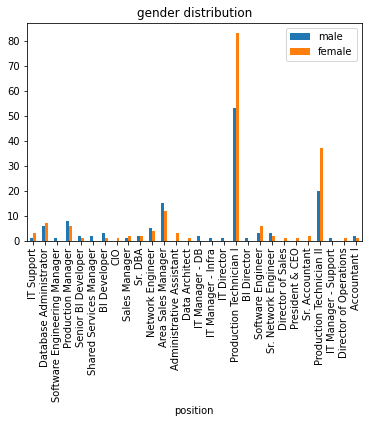

In [220]:
df.index = df.position
ax = df.plot.bar()
ax.set_title('gender distribution')
ax.legend(['male', 'female'])
plt.show()

#### Проверка гипотезы: В компании есть сотрудники достойные повышения.

In [ ]:
conn = psycopg2.connect(host='dsstudents.skillbox.ru', port=5432, dbname='human_resources', user='readonly', 
                        password='6hajV34RTQfmxhS')

cursor = conn.cursor()

req = """SELECT "position", "perf_scoreid", "Employee Name"
         FROM hr_dataset
         WHERE "perf_scoreid" = 9
         GROUP BY "position", "perf_scoreid", "Employee Name"
         ORDER BY "position", "perf_scoreid" DESC
      """

cursor.execute(req)

colnames = [desc[0] for desc in cursor.description] # Получение названий колонок
records = cursor.fetchall() # Получение записей

df = pd.DataFrame(records, columns=colnames)

cursor.close()
conn.close()

df.head(50)

,position,perf_scoreid,Employee Name
0,Administrative Assistant,9,"Howard, Estelle"
1,Administrative Assistant,9,"Singh, Nan"
2,Area Sales Manager,9,"McKinzie, Jac"
3,Database Administrator,9,"Hernandez, Daniff"
4,Database Administrator,9,"Horton, Jayne"
5,Database Administrator,9,"Rogers, Ivan"
6,Network Engineer,9,"Cisco, Anthony"
7,Network Engineer,9,"Merlos, Carlos"
8,Network Engineer,9,"Turpin, Jumil"
9,Production Technician I,9,"Anderson, Carol"


Вывод: Как минимум приведенные выше люди требуют внимания и возможного повышения.

С каких позиций чаще всего уходят

In [239]:
conn = psycopg2.connect(host='dsstudents.skillbox.ru', port=5432, dbname='human_resources', user='readonly', 
                        password='6hajV34RTQfmxhS')

cursor = conn.cursor()

req = """SELECT "position", "perf_scoreid", COUNT(*)
         FROM hr_dataset
         WHERE "Date of Termination" IS NOT null AND "perf_scoreid" > 7
         GROUP BY "position", "perf_scoreid"
         ORDER BY "position", "perf_scoreid" DESC
      """

cursor.execute(req)

colnames = [desc[0] for desc in cursor.description] # Получение названий колонок
records = cursor.fetchall() # Получение записей

df = pd.DataFrame(records, columns=colnames)

cursor.close()
conn.close()

df

,position,perf_scoreid,count
0,Administrative Assistant,9,1
1,Database Administrator,9,1
2,Production Technician I,9,8
3,Production Technician II,9,4


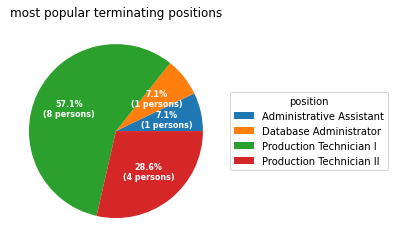

In [241]:
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))

data = df['count'].to_list()
ingredients = df.position.to_list()


def func(pct, allvals):
    absolute = int(np.around(pct/100*sum(allvals)))
    return "{:.1f}%\n({} persons)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="position",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("most popular terminating positions")

plt.show()

Вывод: особое внимание обратить на должность *Production Technician I* т.к. с этой позиции чаще всего увольняются.



**Рекомендация HR: В компании есть люди с высоким индексом производительности и засидевшиеся на своих должностях. Требуется обратить на них внимание и возможно некоторые из них достойны повышения. Особое внимание обратить на должность *Production Technician I* т.к. с этой позиции чаще всего увольняются.**

#### Проверка гипотезы: В компании есть сильно завышенные статьи затрат на набор персонала.

In [242]:
# Какая статья наиболее дорогая в пересчете на одного сотрудника

conn = psycopg2.connect(host='dsstudents.skillbox.ru', port=5432, dbname='human_resources', user='readonly', 
                        password='6hajV34RTQfmxhS')

cursor = conn.cursor()

req = """SELECT hr_dataset."Employee Source", COUNT(hr_dataset."id") as persons, MAX(recruiting_costs."Total") as sum, MAX(recruiting_costs."Total")/COUNT(hr_dataset."id") as per_person
         FROM hr_dataset
         JOIN recruiting_costs 
         ON hr_dataset."Employee Source" = recruiting_costs."Employment Source"
         GROUP BY hr_dataset."Employee Source"
         ORDER BY "per_person" DESC
      """

cursor.execute(req)

colnames = [desc[0] for desc in cursor.description] # Получение названий колонок
records = cursor.fetchall() # Получение записей

df = pd.DataFrame(records, columns=colnames)

cursor.close()
conn.close()

df.head(40)

,Employee Source,persons,sum,per_person
0,Careerbuilder,1,7790,7790
1,Pay Per Click,1,1323,1323
2,MBTA ads,17,10980,645
3,On-campus Recruiting,12,7500,625
4,Website Banner Ads,13,7143,549
5,Social Networks - Facebook Twitter etc,11,5573,506
6,Newspager/Magazine,18,8291,460
7,Other,9,3995,443
8,Billboard,16,6192,387
9,Diversity Job Fair,29,10021,345


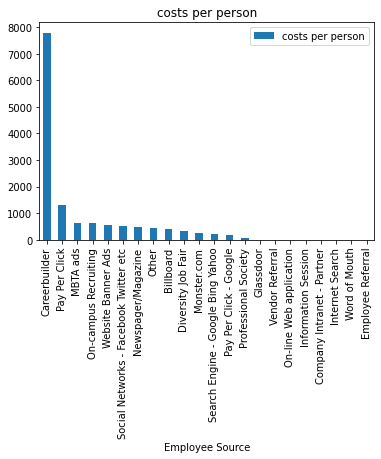

In [246]:
df.index = df['Employee Source']
ax = df['per_person'].plot.bar()
ax.set_title('costs per person')
ax.legend(['costs per person'])
plt.show()

Вывод: Действительно, есть статьи расходов которые сильно превышают расходы в расчете на одного человека. Возможно стоит их сократить.

**Рекомендация HR: В компании есть статьи расходов которые сильно превышают расходы в расчете на одного человека. Возможно стоит их сократить.**

### Общие выводы:
1. "Старшие" сотрудники в компании получают больше вознаграждение, чем их коллеги с меньшими должностями. Однако и времени на работе они проводят больше.
2. Свободные (не женатые) сотрудники увольняются чаще и среди мужчин и среди женщин. Большинство уволенных - женщины. Нужно поженить  мужчин и женщин (тем более они ровестники), чтобы уменьшить текучку кадров:)
3. В штатном расписании (таблица *salary_grid*) есть пробелы. Должности не соответствуют, приведенным в таблице *hr_dataset*. Нужно привести в порядок.
4. В компании соблюдается гендерный баланс в руководящем составе, что способствует принятию правильных решений.
5. В компании 36 человек показывают максимальный индекс производительности на своих позициях. Возможно некоторые из них достойны повышения. Особое внимание стоит обратить на сотрудников в должности *Production Technician I*, т.к. именно эта позиция наиболее "текучая".
6. В компании завышены затраты на подбор персона в компаниях *Careerbuilder* и *Pay Per Click*. Возможно стоит отказаться от их услуг.

## Часть вторая

Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br> 
Подключитесь к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br> 

Дополнительные инструкции по работе с API VK расположены [здесь](https://colab.research.google.com/drive/1rRaTay-OSPLAOX8V9UaFvTiAciVtp2s3).

In [ ]:
### YOUR CODE HERE ###


